In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from tqdm.notebook import tqdm

from torchvision import transforms

from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import timm
import torch.optim as optim
import torch
import torch.nn as nn
from scipy.ndimage import gaussian_filter, median_filter

from skimage.restoration import (
    denoise_tv_chambolle,
    denoise_bilateral,
    denoise_wavelet,
    estimate_sigma,
)

In [19]:
#dir_list_fourier = "C:\\Users\\polsi\\Downloads\\TestSet\\TestSet\\biggan_256\\"
#dir_list_fourier = "C:\\Users\\mario\\Desktop\\Biometria\\ArtiFact dataset\\afhq\\afhq\\afhq\\afhq\\val\\cat\\"
dir_list_fourier = "C:\\Users\\mario\\Desktop\\Biometria\\ArtiFact dataset\\big_gan\\big\\biggan-data\\0\\"

dir_list = np.array(os.listdir(dir_list_fourier))

#Qui va il numero di mmagini che volete analizzare
numImages = 10

dir_list = dir_list[0:numImages]

#Qui va la dimensione delle immagini che volete analizzare
superImage = np.zeros((200, 200, 3))

#In questo for calcolo il residuo di ciascuna immagine e lo sommo di volta in volta
for filename in tqdm(dir_list):
    img = cv2.imread(dir_list_fourier + filename)
    #Di seguito sono commentate diverse tecniche per il calcolo dei residui? Ne esistono delle migliori? Ditemelo voi! :)
    currentResidual = img - gaussian_filter(img, sigma=1)
    #currentResidual = img - median_filter(img, size=4)
    #currentResidual = img - denoise_bilateral(img, sigma_color=0.1, sigma_spatial=4, channel_axis=-1)
    #currentResidual = img - denoise_wavelet(img, channel_axis=-1, convert2ycbcr=True, rescale_sigma=True)
    #currentResidual = img - denoise_tv_chambolle(img, weight=0.1, channel_axis=-1)

    superImage = superImage + currentResidual

#Qui alla fine faccio la media
superImage = superImage / numImages

  0%|          | 0/10 [00:00<?, ?it/s]

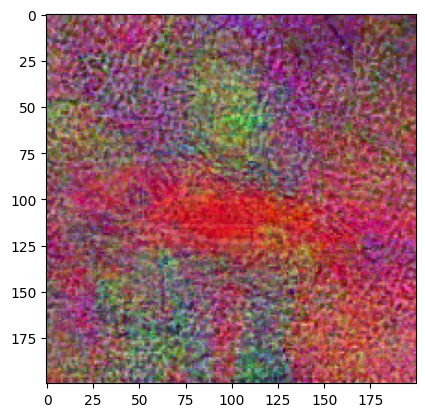

(200, 200)


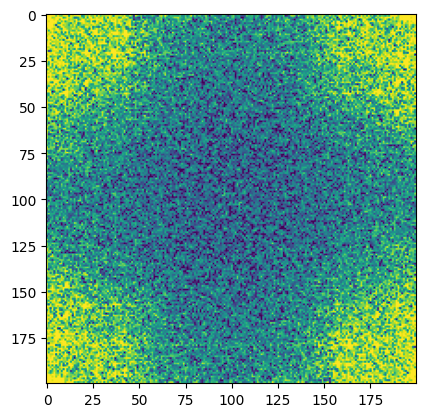

In [20]:
#qui visualizzo l'immagine della media dei residue e poi la trasformo con fourier

superImage = np.float32(superImage/255)
plt.imshow(superImage)
plt.show()

grayImg = cv2.cvtColor(superImage, cv2.COLOR_BGR2GRAY)
print(grayImg.shape)

img = np.float32(grayImg) / 255.0


fft_img = np.fft.fft2(grayImg)

fft_img = np.log(np.abs(fft_img))
fft_min = np.percentile(fft_img, 5)
fft_max = np.percentile(fft_img, 95)

#Questa è una normalizzazione che ho trovato su un codice. Serve a mettere in risalto le fingerprint
if (fft_max - fft_min) <= 0:
    print('ma cosa...')
    fft_img = (fft_img - fft_min) / ((fft_max - fft_min)+np.finfo(float).eps)
else:
    fft_img = (fft_img - fft_min) / (fft_max - fft_min)
    fft_img = (fft_img - 0.5) * 2
    fft_img[fft_img < -1] = -1
    fft_img[fft_img > 1] = 1

plt.imshow(fft_img)
plt.show()